# 회귀 과제
21 Jan 2021(Thu)

---

마감 시간: **28 Jan 2021(Thu) 19:30**  
제출 형식: 본인 Github에 다음과 같은 파일명으로 두 개의 파일을 업로드하시면 됩니다.  
- 18기_학과명_이름.ipynb  
- graduate_submission.csv

# 구글 드라이브 mount **(Colab을 사용하는 경우에만 해당)**
Jupyter Notebook을 사용하시는 경우 이 부분은 무시하고 진행하시면 됩니다.

# 목표: 대학원 합격 확률 및 합격 여부 예측

- 회귀: 학습 데이터로 선형 회귀, Ridge, Lasso를 통해 학습시켜 봅시다.

- 분류: 학습 데이터의 합격 확률을 범주형 자료로 바꿔준 다음, 로지스틱 회귀를 통해 학습시켜 봅시다.

완성된 모델로 테스트 데이터의 **합격 여부**를 예측해보세요. (합격 여부를 예측하는 것은 분류 문제입니다.)  
아래의 빈칸(코드+서술 답안)을 모두 채워 넣어주시면 됩니다.  
"## TODO"라고 적힌 부분에는 코드를 작성하여 주시고, "A."라고 적힌 부분에는 서술 답안을 작성하여 주세요.  
이를 모두 완성한 **(1) ipynb 파일**과 최종 예측을  **(2) csv 파일**로 저장하여 본인 Github에 업로드하시면 됩니다.

In [1]:
# 패키지 불러오기
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# 경고 무시
import warnings
warnings.filterwarnings(action='ignore')

# 데이터 로드 및 확인
graduate_train.csv 파일과 graduate_test.csv 파일을 My Drive에 넣어주세요.  
(Jupyter Notebook을 사용하시는 경우에는 graduate_train.csv 파일과 graduate_test.csv 파일 경로를 각각의 로컬 디렉토리 위치로 변경해주세요.)

In [3]:
# train 데이터 불러오기
df = pd.read_csv("./graduate_train.csv")

# train 데이터 크기 확인
print("data size:", df.shape)

# train 데이터 훑어보기
df.head(10)

data size: (400, 8)


,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,310,105,2,3.0,3.5,8.01,No,0.71
1,307,105,2,2.5,4.5,8.12,Yes,0.67
2,329,111,4,4.5,4.0,9.01,Yes,0.81
3,300,105,1,1.0,2.0,7.80,No,0.58
4,329,114,5,4.0,5.0,9.30,Yes,0.86
5,300,104,3,3.5,3.0,8.16,No,0.71
6,318,103,3,4.0,4.5,8.49,Yes,0.71
7,322,110,4,4.0,5.0,9.13,Yes,0.86
8,315,105,2,2.0,2.5,7.65,No,0.39
9,332,119,4,5.0,4.5,9.24,Yes,0.90


In [4]:
# test 데이터 불러오기
test = pd.read_csv("./graduate_test.csv")

# test 데이터 크기 확인
print("data size:", test.shape)

# test 데이터 훑어보기
test.head(10)

# test 데이터에는 'Chance of Admit'이 없습니다. 이 확률을 예측해보는 것이 과제입니다.

data size: (100, 7)


,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,304,103,5,5.0,4.0,8.64,No
1,297,96,2,2.5,1.5,7.89,No
2,302,101,2,2.5,3.5,7.96,No
3,318,112,3,4.0,3.5,8.67,No
4,304,100,4,1.5,2.5,7.84,No
5,330,116,4,5.0,4.5,9.45,Yes
6,315,110,2,3.5,3.0,8.46,Yes
7,317,107,3,4.0,3.0,8.70,No
8,330,114,3,4.5,4.5,9.24,Yes
9,323,111,5,4.0,5.0,9.86,Yes


# 1. 결측치

데이터에 결측치가 있는지 확인해보세요.

In [5]:
## TODO
print(df.isnull().sum())
print(test.isnull().sum())

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
dtype: int64


Q. 데이터에 결측치가 있나요? 어떤 방법으로 처리하였나요?  
A. 결측치가 없습니다.

# 2. 범주형 변수

설명변수 중 범주형 변수가 존재하나요?  
존재한다면 어떻게 처리해주어야 할까요?  
**학습 데이터를 수정하는 경우 테스트 데이터도 그에 맞게 수정해주어야 된다는 점에 유의하세요.**

In [6]:
df.apply(lambda x: len(x.unique()))

GRE Score             49
TOEFL Score           28
University Rating      5
SOP                    9
LOR                    8
CGPA                 165
Research               2
Chance of Admit       60
dtype: int64

In [7]:
## TODO
print("Data types")
print(df.dtypes)
print('=' * 50)
print("Unique numbers")
print(df.apply(lambda x: len(x.unique())))

df["Research"].replace({'Yes': 1, 'No': 0}, inplace=True)
df.head()

Data types
GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research              object
Chance of Admit      float64
dtype: object
Unique numbers
GRE Score             49
TOEFL Score           28
University Rating      5
SOP                    9
LOR                    8
CGPA                 165
Research               2
Chance of Admit       60
dtype: int64


,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,310,105,2,3.0,3.5,8.01,0,0.71
1,307,105,2,2.5,4.5,8.12,1,0.67
2,329,111,4,4.5,4.0,9.01,1,0.81
3,300,105,1,1.0,2.0,7.80,0,0.58
4,329,114,5,4.0,5.0,9.30,1,0.86


In [8]:
test["Research"].replace({'Yes': 1, 'No': 0}, inplace=True)
test.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,304,103,5,5.0,4.0,8.64,0
1,297,96,2,2.5,1.5,7.89,0
2,302,101,2,2.5,3.5,7.96,0
3,318,112,3,4.0,3.5,8.67,0
4,304,100,4,1.5,2.5,7.84,0


Q. 어떤 변수가 범주형인가요? 어떻게 처리해 주었나요?  
A. Research 변수(연구경험변수)가 범주형으로, Yes면 1, No면 0으로 처리했습니다.

# 3. 선형(Linear) 회귀

In [9]:
# 먼저 데이터를 설명변수와 종속변수로 분리합니다.
X = df.drop('Chance of Admit', axis=1)
y = df['Chance of Admit']

In [10]:
# 데이터를 train과 test로 분리하여 사용합니다.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

In [11]:
# 각각의 크기 확인
print("training predictors size:", X_train.shape)
print("training response size:", y_train.shape)
print("test predictors size:", X_test.shape)
print("test response size:", y_test.shape)

training predictors size: (320, 7)
training response size: (320,)
test predictors size: (80, 7)
test response size: (80,)


### 3.1. scikit-learn으로 선형 회귀

In [12]:
from sklearn.linear_model import LinearRegression

In [13]:
# 1. 먼저 모델을 만들어 줍니다.
## TODO
model = LinearRegression()

# 2. 모델을 적합시킵니다.
## TODO
model.fit(X_train, y_train)

# 3. train 세트와 test 세트에서의 성능을 확인합니다. (이 경우 결정계수 R^2)
## TODO
print("Train score: %.6f" % model.score(X_train, y_train))
print("Test score: %.6f" % model.score(X_test, y_test))

Train score: 0.825984
Test score: 0.772913


#### 3.1.1. 모델의 MSE와 R^2를 구해봅시다.

In [14]:
from sklearn.metrics import mean_squared_error, r2_score

In [15]:
# 4. X_test로 y_pred를 만들어줍니다.
## TODO
y_pred = model.predict(X_test)

print('MSE: %.4f' % mean_squared_error(y_test, y_pred))
print('Variance score: %.4f' % r2_score(y_test, y_pred))

MSE: 0.0040
Variance score: 0.7729


#### 3.1.2. 모델의 절편 계수를 확인해봅시다.

In [16]:
## TODO
print(model.intercept_)

-1.255182866407638


Q. 절편 계수의 의미는 무엇인가요?  
A. 모든 인풋이 0일때 y의 예측값

#### 3.1.3. 모델의 기울기 계수를 확인해 보세요.

In [17]:
## TODO
print(pd.DataFrame(model.coef_, index=X.columns, columns=["Coef"]))

                       Coef
GRE Score          0.001640
TOEFL Score        0.003606
University Rating  0.002748
SOP                0.007253
LOR                0.017343
CGPA               0.112079
Research           0.026481


Q. 기울기 계수의 의미는 무엇인가요? 어떤 예측변인이 대학원 합격 확률과 유의미한 관계를 가지고 있으며 이것을 어떻게 해석할 수 있나요?  
A. CGPA, Research 변수가 합격 확률과 유의미한 관계가 있다. 기울기 계수의 의미란 다른 변수가 고정일 때 x의 unit 증가에 따른 y의 변화량을 의미한다.

#### 3.1.4. 연속형 설명변수 중 하나를 골라 종속변수와의 관계를 scatter plot으로 그려 보세요.

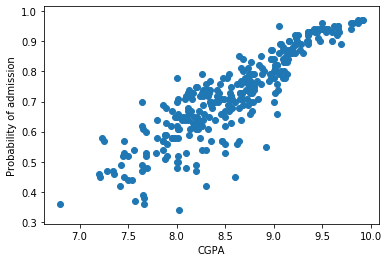

In [18]:
## TODO
plt.scatter(X_train['CGPA'], y_train)
plt.xlabel("CGPA")
plt.ylabel("Probability of admission")
plt.show()

#### 3.1.5. 범주형 설명변수와 종속변수의 관계를 box plot으로 그려 보세요.

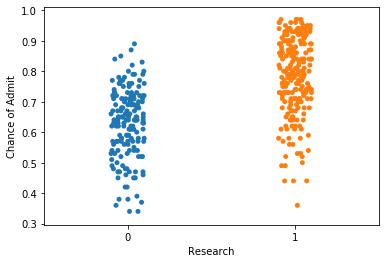

In [19]:
## TODO
sns.stripplot(x='Research', y='Chance of Admit', data=df);

### 3.2. StatsModels로 선형 회귀 시행하기

In [20]:
import statsmodels.api as sm

In [21]:
## TODO
model = sm.OLS(y_train, X_train)
results = model.fit()

print(results.f_test(np.identity(len(X_train.columns))))
print(results.rsquared, results.rsquared_adj)

<F test: F=array([[5233.42343763]]), p=4.9456e-320, df_denom=313, df_num=7>
0.9915283973139877 0.9913389365510417


Q. R^2와 F-statistic을 고려해 볼 때, 이 모델은 좋은 모델이라고 볼 수 있나요?  
A. F-stat의 p-value가 0에 가깝고 R^2이 1에 가까우니 좋은 모델입니다.

Q. 계수에 대한 가설 검정 결과를 바탕으로 'University Rating'이 대학원 합격률에 미치는 영향을 어떻게 해석할 수 있을까요?  
A. 적어도 하나이상의 x변수가 y변수와 유의미한 선형관계에 있습니다.

# 4. Ridge, Lasso 회귀

이번에는 scikit-learn으로 Ridge와 Lasso를 시도해 보세요.  
**가장 적절한 수준의 alpha를 찾아 모델에 적용해 보세요.**  
(힌트: cross-validation을 사용하세요.)  
(참고자료:
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html  
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html)

In [22]:
from sklearn.linear_model import RidgeCV

# 1. 먼저 모델을 만들어 줍니다.
## TODO
ridge = RidgeCV(cv=5)

# 2. 모델을 적합시킵니다.
## TODO
ridge.fit(X_train, y_train)

# 3. train 세트와 test 세트에서의 성능을 확인합니다. (이 경우 결정계수 R^2)
## TODO
print("Train score: %.6f" % ridge.score(X_train, y_train))
print("Test score: %.6f" % ridge.score(X_test, y_test))

Train score: 0.825913
Test score: 0.771113


In [23]:
from sklearn.linear_model import LassoCV

from sklearn.linear_model import RidgeCV

# 1. 먼저 모델을 만들어 줍니다.
## TODO
lasso = LassoCV(cv=5)

# 2. 모델을 적합시킵니다.
## TODO
lasso.fit(X_train, y_train)

# 3. train 세트와 test 세트에서의 성능을 확인합니다. (이 경우 결정계수 R^2)
## TODO
print("Train score: %.6f" % lasso.score(X_train, y_train))
print("Test score: %.6f" % lasso.score(X_test, y_test))

Train score: 0.824821
Test score: 0.769084


# 5. Logistic 회귀

종속변수를 범주형 자료로 바꿔 합격확률이 아닌 **합격여부**를 예측해보겠습니다.  
**이 문제에서는 합격확률이 0.7이상이면 합격으로 판단하고 0.7미만이면 불합격으로 판단합니다.**  
(0.7이라는 숫자는 임의로 지정한 것일 뿐, 분류 문제에서 기준이 되는 threshold는 보다 더 신중하게 결정해야 합니다. 보통 default값은 0.5입니다.)

In [24]:
# train 데이터의 종속변수인 'Chance of Admit'은 숫자형 자료로 이루어져 있습니다.
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,310,105,2,3.0,3.5,8.01,0,0.71
1,307,105,2,2.5,4.5,8.12,1,0.67
2,329,111,4,4.5,4.0,9.01,1,0.81
3,300,105,1,1.0,2.0,7.80,0,0.58
4,329,114,5,4.0,5.0,9.30,1,0.86


In [25]:
# 종속변수인 'Chance of Admit'을 범주형 자료로 바꿔줍시다. 0.7 이상은 합격(1), 0.7 미만은 불합격(0)으로 지정해줍니다.
df["Chance of Admit"] = df["Chance of Admit"].apply(lambda x: 1 if x>=0.7 else 0)

# for문을 사용할 수도 있지만 웬만하면 for문은 지양하도록 합시다.
# for i in range(400):
#     df["Chance of Admit"][i] = 1 if df["Chance of Admit"][i]>=0.7 else 0

In [26]:
# 'Chance of Admit'이 제대로 변경되었는지 확인해봅시다.
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,310,105,2,3.0,3.5,8.01,0,1
1,307,105,2,2.5,4.5,8.12,1,0
2,329,111,4,4.5,4.0,9.01,1,1
3,300,105,1,1.0,2.0,7.80,0,0
4,329,114,5,4.0,5.0,9.30,1,1


In [27]:
# 먼저 종속변수와 설명변수를 지정해줍니다.
X = df.drop("Chance of Admit", axis=1)
y = df["Chance of Admit"]

In [28]:
# train과 test로 분리하여 사용합니다.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

In [29]:
# 각각의 크기 확인
print("training predictors size:", X_train.shape)
print("training response size:", y_train.shape)
print("test predictors size:", X_test.shape)
print("test response size:", y_test.shape)

training predictors size: (320, 7)
training response size: (320,)
test predictors size: (80, 7)
test response size: (80,)


In [30]:
from sklearn.linear_model import LogisticRegression

# 1. 먼저 모델을 만들어 줍니다.
## TODO
log_reg = LogisticRegression()

# 2. 모델을 적합시킵니다.
## TODO
log_reg.fit(X_train, y_train)

# 3. train 세트에서의 성능을 확인합니다.
## TODO
print("Train Acc: %.6f" % log_reg.score(X_train, y_train))

Train Acc: 0.809375


In [31]:
# 학습된 모델로부터 대학원 합격을 예측하고 accuracy, f1-score, confusion matrix를 구해봅시다.
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

# 0.7 이상은 1로, 0.7 미만은 0으로 예측하는 코드
y_pred = np.where(log_reg.predict_proba(X_test)[:,1]>0.7, 1, 0)

print("Accuracy: %.2f" % accuracy_score(y_test, y_pred))
print("F1 score: %.2f" % f1_score(y_test, y_pred))

print("-"*40)
print("Confusion matrix", "\n")
print(pd.DataFrame(confusion_matrix(y_test, y_pred)))

Accuracy: 0.79
F1 score: 0.77
----------------------------------------
Confusion matrix 

    0   1
0  34   4
1  13  29


In [32]:
# 이제 test 데이터를 불러와 학습한 모델로 합격 여부를 예측해봅시다.
test.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,304,103,5,5.0,4.0,8.64,0
1,297,96,2,2.5,1.5,7.89,0
2,302,101,2,2.5,3.5,7.96,0
3,318,112,3,4.0,3.5,8.67,0
4,304,100,4,1.5,2.5,7.84,0


In [33]:
# test 데이터로 예측결과인 pred를 만들어줍니다.
## TODO
pred = log_reg.predict(test)

In [34]:
# test 데이터에 예측결과를 추가해줍니다.
test["Chance of Admit"] = pred
test.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,304,103,5,5.0,4.0,8.64,0,1
1,297,96,2,2.5,1.5,7.89,0,0
2,302,101,2,2.5,3.5,7.96,0,0
3,318,112,3,4.0,3.5,8.67,0,1
4,304,100,4,1.5,2.5,7.84,0,0


In [35]:
# 예측된 결과를 csv 파일로 저장해줍니다. ipynb 파일과 csv 파일을 본인 Github에 업로드해주시면 됩니다.
test.to_csv("graduate_submission.csv", index=False)